#Sonja's run of the data through models

#1. unsupervised learning - clusters using K means



In [95]:
# importing initial libaries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 

In [96]:
#storing source data to keep synced with any changes
datafile = "./1_numeric_outliers_removed_transformed.csv"

In [97]:
# read in CSV file to use for DataFrame
denver_df = pd.read_csv(datafile)



# Check dataframe
denver_df.head()

,id,num__accommodates,num__bedrooms,num__beds,num__price,num__availability_30,num__availability_60,num__availability_90,num__availability_365,num__number_of_reviews,...,bool__host_identity_verified_t,bool__has_availability_t,bool__instant_bookable_t,bool__prop_type_reduced_Entire condo,bool__prop_type_reduced_Entire guest suite,bool__prop_type_reduced_Entire guesthouse,bool__prop_type_reduced_Entire home,bool__prop_type_reduced_Entire rental unit,bool__prop_type_reduced_Entire townhouse,bool__prop_type_reduced_Other
0,360,-0.562715,0.152657,-0.192967,-0.931810,-0.551344,0.120505,0.449145,-0.210263,1.146599,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,364,-0.562715,-0.885936,-0.935868,0.207151,1.504547,1.454513,1.306215,1.467521,0.229000,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,31503,-0.997213,-0.885936,-0.935868,-0.765445,0.314295,0.890125,0.943609,1.380054,0.947121,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,39405,-0.997213,-0.885936,-0.935868,-0.343133,-0.334934,-0.905654,-0.374960,-0.472665,6.013866,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,154999,-0.997213,-0.885936,-0.935868,-0.010403,-0.984163,-1.264810,-1.429815,-0.273876,-0.529017,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Initially I ran all the Kmeans and PCA on this above dataset- but found that the id was skewing all the analysis - it dominated the PCA. so I reran with id removed to help give some variance to the data.

In [98]:
#remove id for PCA analysis
denver_df2 = denver_df.copy()
denver_df2 = denver_df2.drop(columns=['id'])
denver_df2.head()

,num__accommodates,num__bedrooms,num__beds,num__price,num__availability_30,num__availability_60,num__availability_90,num__availability_365,num__number_of_reviews,num__number_of_reviews_ltm,...,bool__host_identity_verified_t,bool__has_availability_t,bool__instant_bookable_t,bool__prop_type_reduced_Entire condo,bool__prop_type_reduced_Entire guest suite,bool__prop_type_reduced_Entire guesthouse,bool__prop_type_reduced_Entire home,bool__prop_type_reduced_Entire rental unit,bool__prop_type_reduced_Entire townhouse,bool__prop_type_reduced_Other
0,-0.562715,0.152657,-0.192967,-0.931810,-0.551344,0.120505,0.449145,-0.210263,1.146599,-0.460933,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.562715,-0.885936,-0.935868,0.207151,1.504547,1.454513,1.306215,1.467521,0.229000,-0.784757,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.997213,-0.885936,-0.935868,-0.765445,0.314295,0.890125,0.943609,1.380054,0.947121,0.464280,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.997213,-0.885936,-0.935868,-0.343133,-0.334934,-0.905654,-0.374960,-0.472665,6.013866,0.834366,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.997213,-0.885936,-0.935868,-0.010403,-0.984163,-1.264810,-1.429815,-0.273876,-0.529017,-0.784757,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
denver_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3565 entries, 0 to 3564
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   num__accommodates                           3565 non-null   float64
 1   num__bedrooms                               3565 non-null   float64
 2   num__beds                                   3565 non-null   float64
 3   num__price                                  3565 non-null   float64
 4   num__availability_30                        3565 non-null   float64
 5   num__availability_60                        3565 non-null   float64
 6   num__availability_90                        3565 non-null   float64
 7   num__availability_365                       3565 non-null   float64
 8   num__number_of_reviews                      3565 non-null   float64
 9   num__number_of_reviews_ltm                  3565 non-null   float64
 10  num__number_

<Axes: xlabel='num__price', ylabel='num__review_scores_rating'>

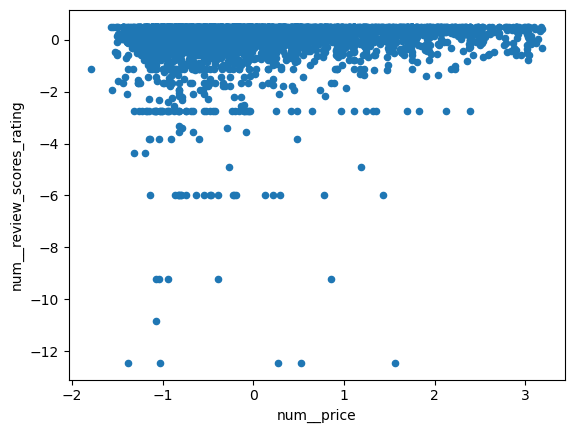

In [100]:
#visualize a scatter plot of data comparing price to  review_scores_rating
denver_df2.plot.scatter(x= "num__price",
                       y="num__review_scores_rating")

In [101]:
#Run K-means model
model = KMeans(n_clusters=5, n_init="auto", random_state=1)
#print model
model

KMeans(n_clusters=5, n_init='auto', random_state=1)

In [102]:
#fit the data to the model
model.fit(denver_df2)


KMeans(n_clusters=5, n_init='auto', random_state=1)

In [103]:
#make predictions
prediction = model.predict(denver_df2)

#print predictions
print(prediction)

[0 1 1 ... 0 1 0]


In [104]:
#copy of dataframe
denver_df_predictions = denver_df2.copy()
#add a column to df to contain prediction  
denver_df_predictions["prediction"] = prediction
#review dataframe
denver_df_predictions.head()

,num__accommodates,num__bedrooms,num__beds,num__price,num__availability_30,num__availability_60,num__availability_90,num__availability_365,num__number_of_reviews,num__number_of_reviews_ltm,...,bool__has_availability_t,bool__instant_bookable_t,bool__prop_type_reduced_Entire condo,bool__prop_type_reduced_Entire guest suite,bool__prop_type_reduced_Entire guesthouse,bool__prop_type_reduced_Entire home,bool__prop_type_reduced_Entire rental unit,bool__prop_type_reduced_Entire townhouse,bool__prop_type_reduced_Other,prediction
0,-0.562715,0.152657,-0.192967,-0.931810,-0.551344,0.120505,0.449145,-0.210263,1.146599,-0.460933,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,-0.562715,-0.885936,-0.935868,0.207151,1.504547,1.454513,1.306215,1.467521,0.229000,-0.784757,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,-0.997213,-0.885936,-0.935868,-0.765445,0.314295,0.890125,0.943609,1.380054,0.947121,0.464280,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
3,-0.997213,-0.885936,-0.935868,-0.343133,-0.334934,-0.905654,-0.374960,-0.472665,6.013866,0.834366,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
4,-0.997213,-0.885936,-0.935868,-0.010403,-0.984163,-1.264810,-1.429815,-0.273876,-0.529017,-0.784757,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [105]:
#write to csv, to determine the grouping definition
denver_df_predictions.to_csv("test.csv",index=False)

<Axes: xlabel='num__price', ylabel='num__review_scores_rating'>

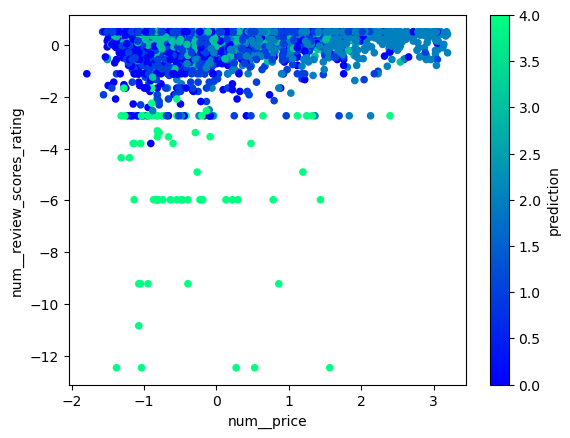

In [106]:
#plot the data points based on prediction
denver_df_predictions.plot.scatter(
    x= "num__price",
    y= "num__review_scores_rating",
    c= "prediction",
    colormap = "winter")


In [107]:
####### play around with clustering values and x and y

Reducing dimensionality with PCA

In [108]:
### initialize PCA
pca = PCA(n_components=5)

In [109]:
#fit and transform using the dataframe
denver_PCA = pca.fit_transform(denver_df2)
#review first rows
denver_PCA[:5]

array([[-1.03887157, -1.00137949,  0.08183574, -0.40353679, -0.83413003],
       [ 0.93614638, -0.16608731,  1.90138197, -2.4432771 ,  0.03891231],
       [-0.55703094, -1.53849925,  2.03920346, -0.93264326, -0.21863105],
       [-1.61171834, -2.60228502,  1.3252558 ,  2.94214684, -1.35951501],
       [ 1.62007839, -1.96574216, -2.20260719, -0.19538335,  0.17064751]])

In [110]:
# Calculate the PCA explained variance ratio
pca.explained_variance_ratio_



array([0.22931507, 0.1788999 , 0.15173555, 0.12570136, 0.03632029])

Each value in the array represents the proportion of the dataset's total variance that is captured by each principal component. The values are typically sorted in descending order, meaning the first component in the list explains the most variance, and each subsequent component explains less. Here's how you can interpret the values:

First component (0.22931507 or 22.93%): This is the principal component that captures the most variance within your dataset. Almost 23% of the total variance in your dataset is explained by this component alone, indicating it captures a significant amount of information.

Second component (0.1788999 or 17.89%): This component captures the second most amount of variance after the first component. Together, the first and second components account for approximately 40.82% of the total variance.



In [117]:
#created a dataframe with the second to show the values so we can trace back to most dominant factor
df_PCA_denver = pd.DataFrame(denver_PCA, columns=["PCA1", "PCA2", "PCA3","PCA4", "PCA5"])

#get identinfying info - set index
#df_PCA_denver["id"]= denver_df2.index
#df_PCA_denver = df_PCA_denver.set_index("id")

df_PCA_denver.head()

,PCA1,PCA2,PCA3,PCA4,PCA5
0,-1.038872,-1.001379,0.081836,-0.403537,-0.834130
1,0.936146,-0.166087,1.901382,-2.443277,0.038912
2,-0.557031,-1.538499,2.039203,-0.932643,-0.218631
3,-1.611718,-2.602285,1.325256,2.942147,-1.359515
4,1.620078,-1.965742,-2.202607,-0.195383,0.170648


In [126]:


# Performing PCA
pca = PCA(n_components=5) # Adjust n_components as needed
pca.fit(denver_df2)

# First principal component's loadings
loadings = pca.components_[0]


In [127]:
# Creating a Series for better readability
loadings_df = pd.Series(loadings, index=denver_df2.columns)

# Sorting the loadings by their absolute values
significant_features = loadings_df.abs().sort_values(ascending=False)

# Displaying the features with the highest contribution
print(significant_features)


num__review_scores_rating                     0.413873
num__review_scores_value                      0.400530
num__review_scores_accuracy                   0.391565
num__review_scores_communication              0.357903
num__review_scores_checkin                    0.328297
num__review_scores_cleanliness                0.310503
num__review_scores_location                   0.287739
num__reviews_per_month                        0.151649
num__number_of_reviews_ltm                    0.150054
num__number_of_reviews_l30d                   0.137820
num__number_of_reviews                        0.120547
num__availability_365                         0.079580
num__availability_30                          0.066757
num__price                                    0.049108
num__availability_60                          0.047936
num__availability_90                          0.036789
bool__prop_type_reduced_Entire rental unit    0.035987
num__accommodates                             0.025802
num__beds 

Rerun the KMeans to see what clusters we get now

In [ ]:
#I'm getting tripped up on my dataframes -   which data frame to use for KMeans?  the PCA data frame or the original?

In [114]:
#initialize K-Means with 5 clusters
model = KMeans(n_clusters=5, n_init="auto", random_state=1)
#fit the model with the pca data frame
model.fit(denver_df2)
#predict the clusters
predictionPCA2=model.predict(denver_df2)

In [119]:
#make a copy 
predictionPCA2_df =df_PCA_denver.copy()
#insert column for prediction cluster
predictionPCA2_df["cluster"]= predictionPCA2
#review dataframe
predictionPCA2_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,cluster
0,-1.038872,-1.001379,0.081836,-0.403537,-0.834130,0
1,0.936146,-0.166087,1.901382,-2.443277,0.038912,1
2,-0.557031,-1.538499,2.039203,-0.932643,-0.218631,1
3,-1.611718,-2.602285,1.325256,2.942147,-1.359515,3
4,1.620078,-1.965742,-2.202607,-0.195383,0.170648,0


<Axes: xlabel='PCA1', ylabel='PCA2'>

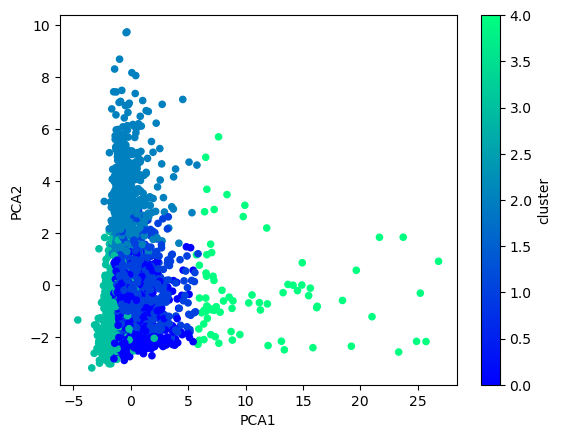

In [128]:
#plot  with PCA 1 and PCA 2
predictionPCA2_df.plot.scatter(
    x= "PCA1",
    y= "PCA2",
    c= "cluster",
    colormap= "winter"
)

In [ ]:
#I changed the df from denverdf2 to the PCA - it definately changed the output...

In [121]:
pca_component_weights = pd.DataFrame(pca.components_[:5].T, columns=["PCA1","PCA2","PCA3","PCA4", "PCA5"], index=denver_df2.columns)
pca_component_weights

,PCA1,PCA2,PCA3,PCA4,PCA5
num__accommodates,-0.025802,0.454995,-0.041466,0.136402,-0.161014
num__bedrooms,-0.016666,0.450847,-0.101945,0.094380,-0.137949
num__beds,-0.025518,0.444880,-0.047095,0.131122,-0.212003
num__price,-0.049108,0.354271,-0.035687,0.078509,0.451337
num__availability_30,0.066757,0.155417,0.402637,-0.254884,0.050001
num__availability_60,0.047936,0.146659,0.459459,-0.256806,0.027238
num__availability_90,0.036789,0.131156,0.464987,-0.240303,0.000133
num__availability_365,0.079580,0.091146,0.291933,-0.227447,-0.168279
num__number_of_reviews,-0.120547,-0.086079,0.201533,0.331219,-0.299535
num__number_of_reviews_ltm,-0.150054,-0.058445,0.286101,0.422348,-0.001641


In [ ]:
pca_component_weights = pd.DataFrame(pca.components_[:5].T, columns=["PCA1","PCA2","PCA3","PCA4", "PCA5"], index=denver_df2.columns)
pca_component_weight_sorted_pca1=pca_component_weights.sort_values(by="PCA1", ascending=False)
pca_component_weight_sorted_pca1

In [ ]:
pca_component_weight_sorted_pca2=pca_component_weights.sort_values(by="PCA2", ascending=False)
pca_component_weight_sorted_pca2

In [ ]:
pca_component_weight_sorted_pca3=pca_component_weights.sort_values(by="PCA3", ascending=False)
pca_component_weight_sorted_pca3

Below is the code from Jen's file that I haven't removed yet

In [ ]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 26))

# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the service_ratings DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=0)
    k_model.fit(denver_pca_no_null)
    inertia.append(k_model.inertia_)

# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}

# Create the DataFrame from the elbow data
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head(26)

In [ ]:
 # Plotting my inertia and k
df_elbow.plot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

In [ ]:
# Define the model Kmeans model... which sucks because it could be 10 or 14
model = KMeans(n_clusters=10, n_init='auto', random_state=0)

# Fit the model
model.fit(denver_pca_no_null)

# Make predictions
k_10 = model.predict(denver_pca_no_null)

# Create a copy of the customers_pca_df DataFrame
denver_pca_predictions_df_10 = denver_pca_no_null.copy()

# Add a class column with the labels
denver_pca_predictions_df_10["customer_segments"] = k_10

In [ ]:
# Plot the clusters
denver_pca_predictions_df_10.plot.scatter(
    x="PC1",
    y="PC2",
    c="customer_segments",
    colormap='winter')

In [ ]:
# Define the model Kmeans model... hold to try more
model = KMeans(n_clusters=7, n_init='auto', random_state=0)

# Fit the model
model.fit(denver_pca_no_null)

# Make predictionsy others
k_7 = model.predict(denver_pca_no_null)

# Create a copy of the customers_pca_df DataFrame
denver_pca_predictions_df_7 = denver_pca_no_null.copy()

# Add a class column with the labels
denver_pca_predictions_df_7["customer_segments"] = k_7

In [ ]:
# hold to try more
denver_pca_predictions_df_7.plot.scatter(
    x="PC1",
    y="PC2",
    c="customer_segments",
    colormap='winter')

# note I don't like this one

In [ ]:
# Plot the clusters using price and if it is available 30 days out - I should probably work on this more 
denver_pca_predictions_df_10.plot.scatter(
    x="num__price",
    y="num__beds",
    c="customer_segments",
    colormap='winter')

In [ ]:
# looking at what weight more 
pca_component_weights = pd.DataFrame(pca.components_.T, columns=[
    "num__accommodates", "num__bedrooms", "num__beds", "num__price", "num__availability_30", "num__availability_60",
    "num__availability_90", "num__availability_365", "num__number_of_reviews", "num__number_of_reviews_ltm",
    "num__number_of_reviews_l30d", "num__review_scores_rating", "num__review_scores_accuracy",
    "num__review_scores_cleanliness", "num__review_scores_checkin", "num__review_scores_communication",
    "num__review_scores_location", "num__review_scores_value", "num__reviews_per_month",
    "bool__host_is_superhost_f", "bool__host_is_superhost_t", "bool__host_is_superhost_nan",
    "bool__host_has_profile_pic_t", "bool__host_identity_verified_t", "bool__has_availability_t",
    "bool__instant_bookable_t", "PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11", "PC12",
    "PC13", "PC14", "PC15", "PC16", "PC17", "PC18", "PC19", "PC20", "PC21", "PC22", "PC23", "PC24", "PC25", "PC26"], index=denver_pca_no_null.columns)
pca_component_weights